## Практическая работа №10

#### Подключение библиотек

In [27]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import sklearn
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


### 1. Найти данные для классификации

In [28]:
data = load_wine(as_frame=True)
predictors = data.data
target = data.target
target_names = data.target_names


In [29]:
print(predictors.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

### 2. Изобразить гистограму

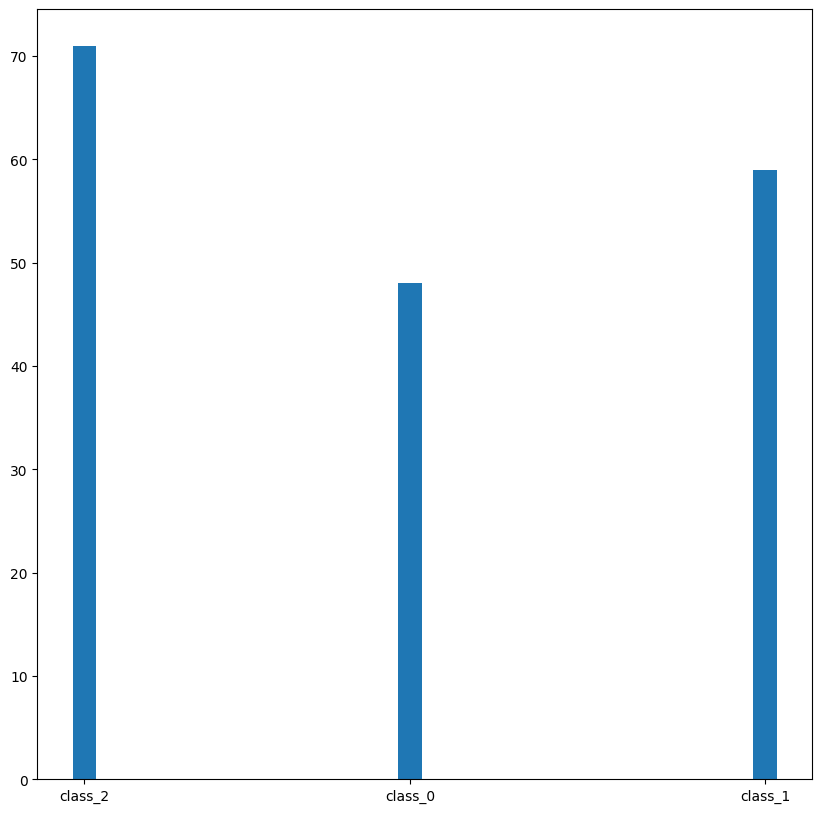

In [30]:
plt.bar(np.bincount(target), height=[48, 59, 71])
plt.xticks(np.bincount(target), target_names);

### 3. Разбить выборку на тренировочную и тестовую

In [31]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, train_size=0.8, shuffle=True, random_state=271)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(142, 13) (36, 13) (142,) (36,)


### 4. Применить алгоритмы классификации

#### Logistic regression

In [49]:
model = LogisticRegression(random_state=271, max_iter=5000)
model.fit(x_train, y_train)

time_start = time.time()

logistic_reg_prediction = model.predict(x_test)

time_end = time.time() - time_start

print('Predicted: \n', logistic_reg_prediction)
print('Reference: \n', np.array(y_test))
print('\n {:.4f} sec.'.format(time_end))

Predicted: 
 [2 1 0 1 1 2 1 1 1 1 1 0 1 0 1 2 1 1 1 2 2 2 1 2 2 0 0 1 2 2 2 1 1 1 0 1]
Reference: 
 [2 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 1 1 2 2 2 1 2 2 0 0 1 2 2 2 1 1 1 0 1]

 0.0014 sec.


In [50]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, logistic_reg_prediction), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

In [64]:
print(classification_report(logistic_reg_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.90      1.00      0.95        19
           2       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.97      0.91      0.94        36
weighted avg       0.95      0.94      0.94        36



#### SVM

In [63]:
param_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel':param_kernel}
model = SVC()

grid_search_svm = GridSearchCV(estimator=model, param_grid=parameters, cv=6)
grid_search_svm.fit(x_train, y_train)
best_model = grid_search_svm.best_estimator_
best_model.kernel

'linear'

In [54]:
time_start = time.time()

svm_prediction = best_model.predict(x_test)

time_end = time.time() - time_start

print('\n {:.4f} sec.'.format(time_end))


 0.0025 sec.


In [55]:
print(classification_report(svm_prediction, y_test))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.86      1.00      0.92        18
           2       1.00      0.91      0.95        11

    accuracy                           0.92        36
   macro avg       0.95      0.87      0.90        36
weighted avg       0.93      0.92      0.91        36



In [56]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, svm_prediction), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')

#### KNN

In [57]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN, param_grid = params, cv = 6)

In [65]:
grid_search.fit(x_train, y_train)
grid_search.best_estimator_
grid_search.best_score_

0.7539251207729469

In [67]:
time_start = time.time()

knn_prediction = grid_search.predict(x_test)

time_end = time.time() - time_start

print('\n {:.4f} sec.'.format(time_end))


 0.0066 sec.


In [68]:
print(classification_report(knn_prediction, y_test))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.76      0.76      0.76        21
           2       0.50      0.62      0.56         8

    accuracy                           0.69        36
   macro avg       0.69      0.65      0.66        36
weighted avg       0.71      0.69      0.70        36



In [69]:
plt.rcParams['figure.figsize'] = (10, 10)
fig = px.imshow(confusion_matrix(y_test, knn_prediction), text_auto=True)
fig.update_layout(xaxis_title = 'Target', yaxis_title = 'Prediction')